# Exercises

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

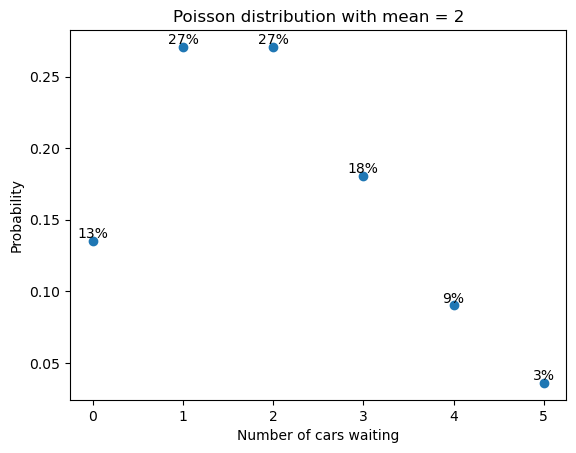

In [36]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars.
# Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the mean of the Poisson distribution
mu = 2

# Generate the x-axis values (number of cars waiting)
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

# Generate the y-axis values (probability of each number of cars waiting)
y = poisson.pmf(x, mu)

# Plot the distribution
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('Number of cars waiting')
ax.set_ylabel('Probability')
ax.set_title('Poisson distribution with mean = 2')

# Add text to each point
for i, j in zip(x, y):
    ax.text(i, j, str(int(j*100))+'%', ha='center', va='bottom')

plt.show()

In [ ]:
# 1a. What is the probability that no cars drive up in the noon hour?

# Set the mean of the Poisson distribution
mu = 2

# Probability of more than 2, when the average is 2.
poisson.sf(2, mu)

In [29]:
# 1b. What is the probability that 3 or more cars come through the drive through?

# Probability of more than 2, when the average is 2.
poisson.sf(2, mu)

0.32332358381693654

In [48]:
# 1c. How likely is it that the drive through gets at least 1 car?

poisson.sf(0, mu)

0.950212931632136

In [43]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

# 2a. What grade point average is required to be in the top 5% of the graduating class?

mu = 3.0
sigma = 0.3

# Find the z-score that corresponds to the top 5% of the distribution
z = stats.norm.isf(0.05)

# Calculate the required grade point average
gpa = mu + z * sigma

gpa

3.4934560880854417

In [49]:
# 2b. What GPA constitutes the bottom 15% of the class?

mu = 3.0
sigma = 0.3

# Find the z-score that corresponds to the bottom 15% of the distribution
z = stats.norm.ppf(0.15)

# Calculate the required grade point average
gpa = mu + z * sigma

gpa


2.689069983151863

In [ ]:
# 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?



In [ ]:
# 2d. If I have a GPA of 3.5, what percentile am I in?



In [ ]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs.
# How likely is it that this many people or more click through?



In [ ]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.



In [ ]:
# 4a. What is the probability that at least one of your first 60 answers is correct?



In [ ]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, 
# about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day?
# How likely is it that it goes two days without getting cleaned up? All week?



In [ ]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime.
# After several weeks of careful observation, you notice that the average number of people in line when 
# your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [ ]:
# 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation.
# For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution
# defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



In [ ]:
# 7a. What percent of employees earn less than 60,000?



In [ ]:
# 7b. What percent of employees earn more than 95,000?



In [ ]:
# 7c. What percent of employees earn between 65,000 and 80,000?



In [ ]:
# 7d. What do the top 5% of employees make?



Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

# Notes

### Definitions

- `rvs`: `rvs` is a method of a random variable object in the `scipy.stats` module that generates random numbers from a probability distribution. For example, `scipy.stats.norm.rvs()` generates random numbers from a normal distribution.

- `pmf`: `pmf` stands for probability mass function. It is a function that gives the probability of a discrete random variable taking a specific value. For example, the `pmf` of a fair six-sided die is `1/6` for each possible value from 1 to 6.

- `pdf`: `pdf` stands for probability density function. It is a function that gives the probability density of a continuous random variable at a specific value. For example, the `pdf` of a normal distribution with mean 0 and standard deviation 1 is given by the formula `f(x) = (1/sqrt(2*pi))*exp(-x^2/2)`.

- `cdf`: `cdf` stands for cumulative distribution function. It is a function that gives the probability that a random variable is less than or equal to a specific value. For example, the `cdf` of a normal distribution with mean 0 and standard deviation 1 can be calculated using the `scipy.stats.norm.cdf()` function.

- `ppf`: `ppf` stands for percent point function, or inverse cumulative distribution function. It is the inverse of the `cdf` function, and gives the value of the random variable that corresponds to a specific probability. For example, the `ppf` of a normal distribution with mean 0 and standard deviation 1 can be calculated using the `scipy.stats.norm.ppf()` function.

- `sf`: `sf` stands for survival function, or complementary cumulative distribution function. It is a function that gives the probability that a random variable is greater than a specific value. For example, the `sf` of a normal distribution with mean 0 and standard deviation 1 can be calculated using the `scipy.stats.norm.sf()` function.

- `isf`: `isf` stands for inverse survival function, or inverse complementary cumulative distribution function. It is the inverse of the `sf` function, and gives the value of the random variable that corresponds to a specific probability. For example, the `isf` of a normal distribution with mean 0 and standard deviation 1 can be calculated using the `scipy.stats.norm.isf()` function.

In [2]:
from scipy import stats

# Make a die roll of a 6 sided die
die_roll = stats.randint(1,7)

In [3]:
ten_k_die = die_roll.rvs(10_000_000)

# The `rvs` method takes an integer argument `size` that specifies the number of random numbers to generate. 

In [8]:
# Probability of a 3?
(ten_k_die == 3).mean()

0.4998255

In [10]:
import numpy as np
import scipy.stats as stats

# Generate 10 random numbers from a normal distribution with mean 0 and standard deviation 1
rvs = stats.norm.rvs(loc=0, scale=1, size=10)

# Calculate the probability density of a normal distribution at x=0
pdf = stats.norm.pdf(x=0, loc=0, scale=1)

# Calculate the cumulative distribution function of a normal distribution at x=0
cdf = stats.norm.cdf(x=0, loc=0, scale=1)

# Calculate the percent point function of a normal distribution for p=0.5
ppf = stats.norm.ppf(q=0.5, loc=0, scale=1)

# Calculate the survival function of a normal distribution at x=0
sf = stats.norm.sf(x=0, loc=0, scale=1)

# Calculate the inverse survival function of a normal distribution for p=0.5
isf = stats.norm.isf(q=0.5, loc=0, scale=1)

Random numbers: [ 1.19743546  0.0609174  -0.24946254 -0.99323423 -0.54159582  0.53853199
 -1.65278785 -1.05011504  0.3468233  -1.1140455 ]
PDF at x=0: 0.3989422804014327
CDF at x=0: 0.5
PPF for p=0.5: 0.0
SF at x=0: 0.5
ISF for p=0.5: 0.0


## Mini Exercise:

In [12]:
# The average battery life for a fully charged iphone-12 is 14 hours with standard deviation of 1.5 hour**

# 1. What kind of probability distribution represents the random variable "battery life in hours"?**

    # Normal distribution because battery life follows a continuous distribution.

# 2. What are the appropriate defining parameters for this distribution?**

    # Mean (μ): The average battery life for a fully charged iPhone-12, which is 14 hours in this case.
    # Standard deviation (σ): The standard deviation of the battery life, which is 1.5 hours in this case.

    # N(μ=14, σ=1.5).

In [13]:
# 3. Create a Scipy object/instance for this distribution**

import scipy.stats as stats

# Create a Scipy object/instance for the normal distribution

batlife = stats.norm(loc=14, scale=1.5)

In [14]:
# 4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:

# Define the parameters of the normal distribution
mu = 14
sigma = 1.5

In [24]:
# Create a Scipy object/instance for the normal distribution
battery_life_dist = stats.norm(mu, sigma)

In [25]:
# a. Probability that the cell phone battery lasts more than 16 hours
battery_life_dist.sf(16)

0.09121121972586788

In [20]:
# b. Probability that the cell phone battery lasts exactly 12 hours
battery_life_dist.pdf(12)

0.10934004978399577

In [18]:
# c. Probability that the cell phone battery lasts 12 hours or less
battery_life_dist.cdf(12)

0.09121121972586788

In [21]:
# d. Hours that the battery lasts for top 25% longest lasting phones
battery_life_dist.ppf(0.75)
    #OR
battery_life_dist.isf(0.25)

15.011734625294123

## Notes Continued

In [26]:
# Binomial Distribution
# The classic example of this is the number of heads you would expect to see after flipping a coin a certain number of times.

0.10572812269266013

In [27]:
# You are taking a multiple choice test consisting of 30 questions that you forgot to study for.
# Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

trials = 30
chance_of_success = 0.25

# Chance of getting more than 10 correct?

more_than_this_many_correct = 10

stats.binom(trials, chance_of_success).sf(more_than_this_many_correct)

0.10572812269266013

## Mini Exercise (Binomial Distribution)

In [39]:
# The probability that a visitor will make a purchase when browsing in your web-store is 1.5%. You expect 350 web-visitors today 


# 1. What kind of probability distribution you have for "# number of visitors who end up making a purchase"?

    # Binomial. Either make a purchase or not. No contingency.

import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the parameters of the binomial distribution
trials = 350 # 350 visitors
probability = 0.015 # 1.5% chance of purchase

# Create a Scipy object/instance for the binomial distribution
visitors_dist = stats.binom(trials, probability)

In [36]:
# a. Probability that exactly 10 visitors will make a purchase
prob_exactly_10 = visitors_dist.pmf(10)

In [35]:
# b. Probability that 13 or more visitors will make a purchase
visitors_dist.sf(12)

0.002802860629349868

In [37]:
# c. Probability that 10 or less visitors will make a purchase
prob_10_or_less = visitors_dist.cdf(10)

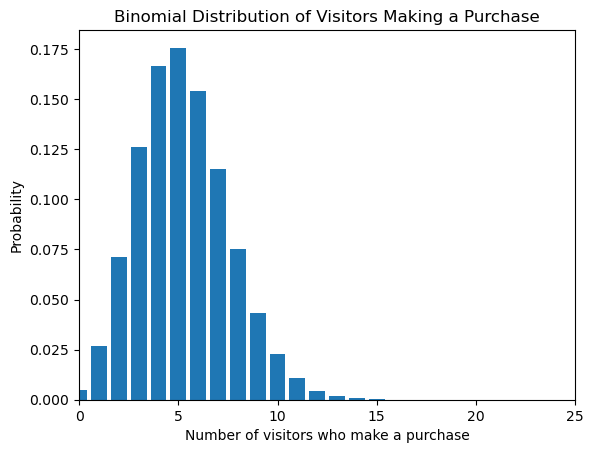

In [38]:
# d. Visualize the resulting distribution
x = range(trials)
plt.bar(x, visitors_dist.pmf(x))
plt.xlabel("Number of visitors who make a purchase")
plt.ylabel("Probability")
plt.title("Binomial Distribution of Visitors Making a Purchase")
plt.xlim(0, 25)
plt.show()

### Notes Continued